# KMeans

## Лабораторная работа №3

Присвойте строку с вашим ФИО переменной `name` и выполните ячейку. В ее выводе будет указан номер вашего варианта.

In [1]:
name = "Сильченко Алексей Евгеньевич" # Впишите ваше ФИО

def calculate_variant(name):
    return sum(ord(char) for char in name) % 2 + 1

print(f"Ваш вариант - №{calculate_variant(name)}")


Ваш вариант - №1



---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Сильченко Алексей Евгеньевич

Группа: 201-361

Вариант: 1

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки как эта с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/kmeans-1.csv
1. http://labcolor.space/kmeans-2.csv

Скопируйте ссылку для своего варианта.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5

## Чтение данных

Используя уже знакомый метод из библиотеки Pandas, считайте данные в формате csv по ссылке из вашего варианта в датафрейм.

Изучите ваш датасет: сколько в нем объектов, сколько признаков, в каких диапазонах изменяются признаки, есть ли в данных целевой признак.

In [3]:
# Ваш код

# URL файла данных
file_url = 'http://labcolor.space/kmeans-1.csv'

# Чтение данных из файла
df = pd.read_csv(file_url)

print("Кол-во объектов:", df.shape[0]) # Количество объектов (строк)
print("Кол-во признаков:", df.shape[1]) # Кол-во признаков(столбцов)
print("Диапазон признаков", df.describe().loc[['min', 'max']])  # Диапазоны признаков
print("Есть ли у нас целевой признак", not all(df.dtypes == 'float64') and not all(df.dtypes == 'int64'))

Кол-во объектов: 70
Кол-во признаков: 150
Диапазон признаков      370.0  372.4161073825503  374.8322147651007  377.248322147651  \
min    0.0                0.0                0.0               0.0   
max    2.0                2.0                2.0               2.0   

     379.66442953020135  382.08053691275165  384.496644295302  \
min                 0.0                 0.0               0.0   
max                 2.0                 2.0               2.0   

     386.9127516778523  389.3288590604027  391.744966442953  ...  \
min                0.0                0.0               0.0  ...   
max                2.0                2.0               2.0  ...   

     708.255033557047  710.6711409395973  713.0872483221476  \
min               0.0                0.0                0.0   
max               2.0                2.0                2.0   

     715.5033557046979  717.9194630872483  720.3355704697987  \
min                0.0                0.0                0.0   
max      

**Опишите ваши данные.**

Сколько в нем объектов: **70**

Сколько признаков: **150**

В каких диапазонах изменяются признаки: **от 0 до 2**

Есть ли в данных целевой признак: **Нет**

## Кластеризация

Когда решалась задача классификации с помощью алгоритма knn в наших данных был целевой признак, по которому можно было определить количество классов. При решении задачи кластеризации мы заранее не имеем информации, по которой мы можем задать количество кластеров, поэтому пока при создании экземпляра объекта выберите количество кластеров до 20. Не забудьте задать `random_state`.

In [4]:
# Импортируйте класс из соответствующего модуля библиотеки sklearn
from sklearn.cluster import KMeans

# Создаем экземпляр KMeans
kmeans = KMeans(n_clusters=20, random_state=0)

# Применяем алгоритм KMeans к данным
kmeans.fit(df)

KMeans(n_clusters=20, random_state=0)

Опишите своими словами за что отвечают параметры:

n_clusters - **Кол-во кластеров на которые алгоритм будет пытаться разделить данные**

init - **Этот параметр задает метод инициализации центроидов кластеров**

n_init - **Этот параметр определяет количество раз, когда алгоритм будет запущен с различными начальными центроидами.**

max_iter - **Этот параметр задает максимальное количество итераций для одного запуска алгоритма.**

random_state - **Этот параметр используется для управления случайностью инициализации центроидо**

После выполнения метода `.fit()` у экземпляра оценщика (estimator) доступны атрибуты `labels_` и `inertia_`.

`labels_` - массив с указаниями индексов кластеров для всех ваших объектов.

Используя `labels_`, посчитайте сколько объектов относится к каждому кластеру.

**Сколько объектов относится к каждому кластеру?**

**Ваш ответ: [2 2 4 6 4 4 3 5 7 1 2 4 3 3 5 4 3 1 1 6]**

In [5]:
# kmeans.labels_

cluster_counts = np.bincount(kmeans.labels_)
print(cluster_counts)

[2 2 4 6 4 4 3 5 7 1 2 4 3 3 5 4 3 1 1 6]


`inertia_` для KMeans это SSD (Sum of squared distances - сумма квадратов расстояний) или по-другому это еще называют SSE (Sum of Squares Error - сумма квадратов ошибки.)

Если SSD это сумма квадратов расстояний, то между чем и чем рассчитываются расстояния?

**Ваш ответ**:  между каждым объектом (точкой данных) и центроидом кластера

In [6]:
# Выведите значение суммы квадратов расстоянияний для вашей модели

#
# Ваш код

inertia = kmeans.inertia_
print(inertia)

36.89303435826649


## Подбор количества кластеров

Для подбора оптимального количества кластеров мы воспользуемся графическим методом - "методом локтя" (Elbow Method). Для этого мы создаем множество моделей с разным количеством кластеров, "подгоняем" (fit) их и оцениваем SSD.

Гипотеза, которая позволяет использовать данный метод, заключается в том, что центройд является прототипом кластера, а следовательно объекты должны кучнее располагаться к нему, поэтому сумма квадратов расстояний должна быть меньше.

**А в каком случае для k средних (KMeans) оцениваемые расстояния равны 0?**

**Ваш ответ: объект в наборе данных точно совпадает с центроидом соответствующего ему кластера**

Теперь ваша задача в цикле создать n моделей и записать их критерий (сумму квадратов расстояний) в словарь (dict).

In [7]:

SSE = {}  # Словарь для хранения сумм квадратов расстояний

for k in np.arange(2, 21):  # Перебираем количество кластеров от 2 до 20
    cluster = KMeans(n_clusters=k, n_init=10, random_state=0)  # Создаем модель KMeans с k кластерами
    cluster.fit(df)  # Применяем модель к данным
    SSE[k] = cluster.inertia_  # Записываем инерцию (сумму квадратов расстояний) в словарь

print(SSE)


{2: 3661.769651978414, 3: 1676.359511150412, 4: 88.23303770138475, 5: 81.64795263335965, 6: 76.18312488443574, 7: 70.75145456251826, 8: 66.62939672944225, 9: 62.87434905763952, 10: 58.468571749767655, 11: 53.99458522922857, 12: 52.58847561035302, 13: 49.423604364961676, 14: 47.25735470048304, 15: 46.47033225687713, 16: 42.837269762409825, 17: 43.063499015195006, 18: 40.51636179949612, 19: 39.8297885191283, 20: 36.89303435826649}


Построим график для оценки, где по оси абсцисс указано количество кластеров, а по оси ординат указано значение, которое описывает сумму квадратов расстояний.

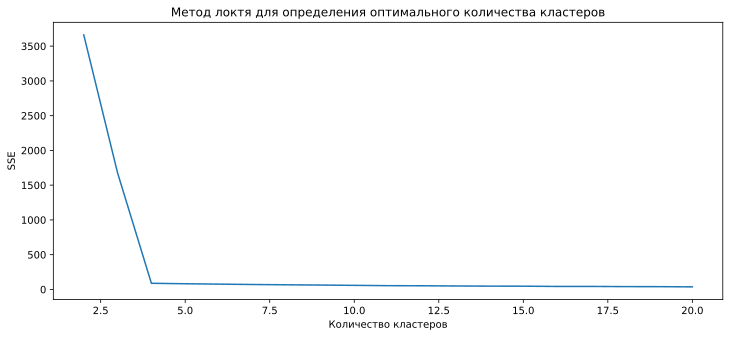

In [8]:
lists = SSE.items()
x, y = zip(*lists)

plt.plot(x, y)
plt.xlabel('Количество кластеров')
plt.ylabel('SSE')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.show()

Теперь по графику найдите число кластеров, начиная с которого критерий SSD снижается не так быстро.

Получившееся число кластеров - **4**.

## Итоговая модель

In [9]:
# Создайте финальный вариант модели с подобраным количеством кластеров и обучите ее.

#
# Ваш код

optimal_clusters = 4

# Создание модели KMeans с оптимальным количеством кластеров
final_model = KMeans(n_clusters=optimal_clusters, random_state=0)

# Обучение модели на данных
final_model.fit(df)

KMeans(n_clusters=4, random_state=0)

In [10]:
# Подсчет количества объектов в каждом кластере
cluster_counts = np.bincount(final_model.labels_)

# Вывод количества объектов в каждом кластере
print(cluster_counts)


[25 16 19 10]


Используя `labels_`, посчитайте сколько объектов относится к каждому кластеру.

**Сколько объектов относится к каждому кластеру?**

**Ваш ответ: [25 16 19 10]**

**Кратко опишите суть алгоритма KMeans.**

**Ваш ответ:**

Алгоритм KMeans — это итерационный алгоритм кластеризации, который делит набор наблюдений на заданное количество кластеров, оптимизируя расстояния от каждой точки до центра кластера.

1. Инициализация: Сначала выбираются начальные центроиды кластеров. Это может быть сделано случайно или с помощью метода, такого как k-means++, который старается разместить центроиды как можно дальше друг от друга для улучшения конечного результата.
2. Присвоение кластеров: Далее, каждое наблюдение присваивается к ближайшему центроиду на основе евклидова расстояния (или другой метрики расстояния). В результате формируются кластеры из точек, ближайших к каждому центроиду.
3. Пересчет центроидов: После присвоения кластеров вычисляется центр тяжести каждого кластера, и центроиды перемещаются туда.
4. Итерация: Шаги присвоения кластеров и пересчета центроидов повторяются итеративно, пока алгоритм не сойдется, что обычно означает, что перемещение центроидов становится меньше некоторого заранее определенного порога, или не будет выполнено заданное количество итераций.